### **Audio Data**

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa as lr
import librosa.display
import IPython.display as ipd

from itertools import cycle

# Style
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


# List all the wav files in the folder
audio_files = glob('datasets/audio_data/set_b/*.wav' )


In [2]:
# Play audio file
ipd.Audio(audio_files[5])


### Inspecting Audio File

In [8]:
# fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# # Calculate the time array
# time = np.arange(normal.shape[0]) / sfreq

## Two DataFrames, normal and abnormal,
## each with the shape of (n_times_points, n_audio_files) containing the audio for several heartbeats are 
## available in your workspace.

# # Stack the normal/abnormal audio so you can loop and plot
# stacked_audio = np.hstack([normal, abnormal]).T

# # Loop through each audio file / ax object and plot
# # .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
# for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
#     ax.plot(time, iaudio)
# show_plot_and_make_titles()

In [11]:
# # Average across the audio files of each DataFrame
# mean_normal = np.mean(normal, axis=1)
# mean_abnormal = np.mean(abnormal, axis=1)

# # Plot each average over time
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
# ax1.plot(time, mean_normal)
# ax1.set(title="Normal Data")
# ax2.plot(time, mean_abnormal)
# ax2.set(title="Abnormal Data")
# plt.show()

In [12]:
# DataFrames (normal and abnormal) into X_train, X_test, y_train, and y_test.

# from sklearn.svm import LinearSVC

# # Initialize and fit the model
# model = LinearSVC()
# model.fit(X_train, y_train)

# # Generate predictions and score them manually
# predictions = model.predict(X_test)
# print(sum(predictions == y_test.squeeze()) / len(y_test))

### **Time gape of each heartbeat**.

In [4]:
# Read in the first audio file, create the time array
audio, sfreq_or_sample_rate = lr.load(audio_files[0])
time = np.arange(0, len(audio)) /  sfreq_or_sample_rate # time gives a array of time gape of each heartbeat

print(audio)
print(sfreq_or_sample_rate)
print(time)


[-0.0062014  -0.00686367 -0.00703143 ...  0.00760843  0.00428894
  0.        ]
22050
[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 1.05961451e+01
 1.05961905e+01 1.05962358e+01]


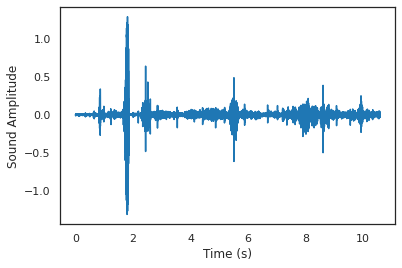

In [10]:
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time , audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

### **Raw Audio Visualization**

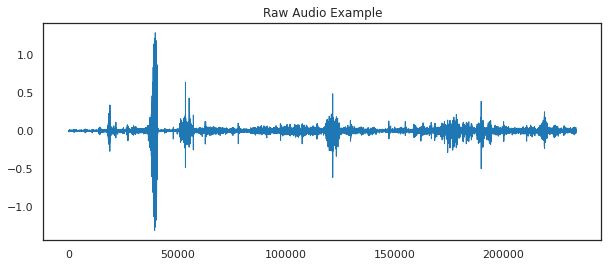

In [11]:
pd.Series(audio).plot(figsize=(10, 4),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

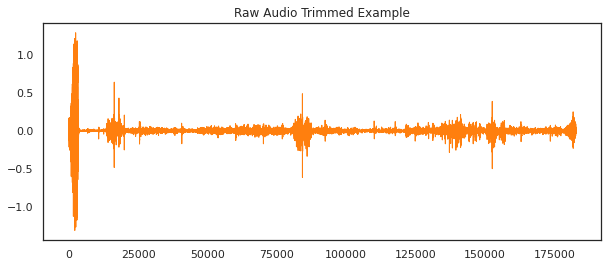

In [12]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(audio, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 4),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

### Zoomed In

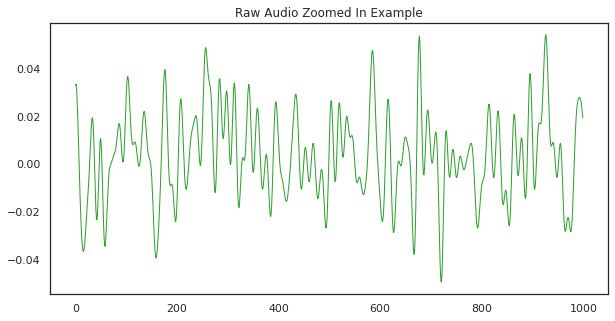

In [13]:
pd.Series(audio[30000:31000]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

### Spectogram

In [14]:
D = librosa.stft(audio)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) # converting aplitude to decible

#### Decibel (Symbol: dB) is a logarithmic unit that indicates ratio or gain.Decibel is used to indicate the level of acoustic waves and electronic signals.The logarithmic scale can describe very big or very small numbers with shorter notation.

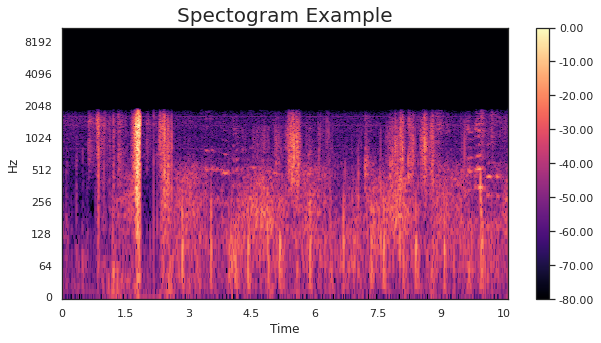

In [15]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

### Mel Spectogram

In [16]:
S = librosa.feature.melspectrogram(y=audio,
                                   sr=sfreq_or_sample_rate,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

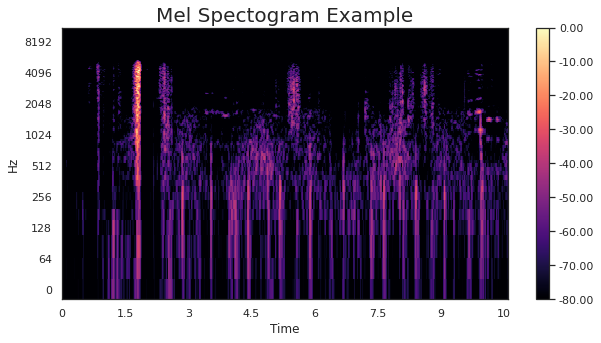

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()